In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import sys
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix

print('Done')

Done


In [113]:
# SMALL INTRODUCTION MATERIALS

# visualization of the ship evacuation process: https://www.youtube.com/watch?v=03IAn3TXVOc
# Titanic Deckplans: https://www.encyclopedia-titanica.org/titanic-deckplans/


In [114]:
# Gathering train and test data
XTRAIN = pd.read_csv("input/train.csv")
XTEST = pd.read_csv("input/test.csv")

In [115]:

# EXPLORING THE DATA & PLAN PREPROCESSING


In [116]:
# So, in training data we have 891 records with 12 columns.
# 5 of them consist text data

# # Looking at missing data
# a lot of missing data in column Cabin, also some missing in Age

XTRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
# for the test data we can see that there is less missing data than in train data
# but also we have only 418 records and 11 cols (no 'Survival')
XTEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

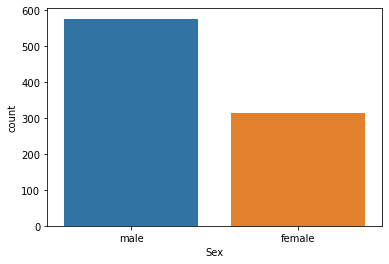

In [118]:
sns.countplot(x="Sex",data=XTRAIN)

<AxesSubplot:xlabel='Parch', ylabel='count'>

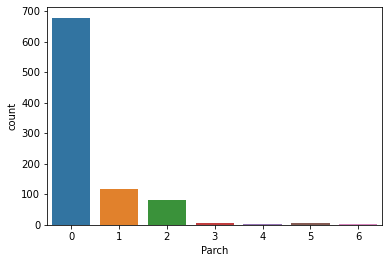

In [119]:
# Parch - parent / child
sns.countplot(x="Parch",data=XTRAIN)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

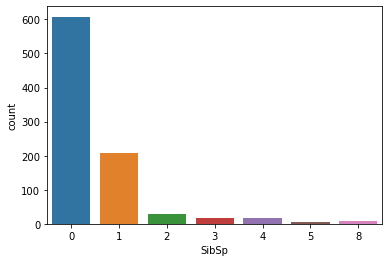

In [120]:
# SibSP - Sibling, spouse (rodzeństwo, małżonek)
sns.countplot(x="SibSp",data=XTRAIN)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

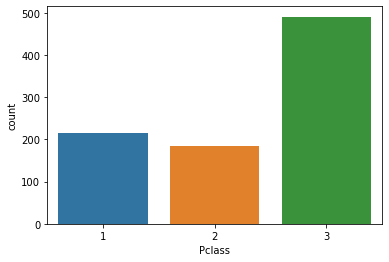

In [121]:
# sns.distplot(x=XTRAIN.Fare,hist=True)
sns.countplot(x="Pclass",data=XTRAIN)

<AxesSubplot:xlabel='Fare', ylabel='count'>

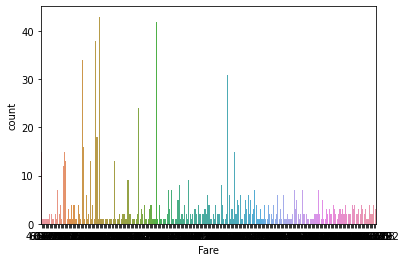

In [122]:
# Fare (opłata)
sns.countplot(x="Fare",data=XTRAIN)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

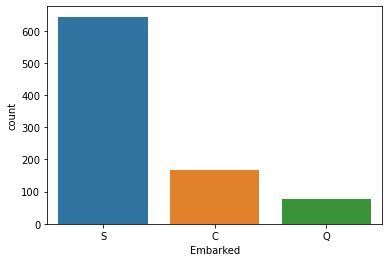

In [123]:
# Embarked - name of the city: S - Southampton, C - Cherbourg, Q - Queenstown (zaokrętowany)
sns.countplot(x="Embarked",data=XTRAIN)

In [124]:
# Correlations between data

<AxesSubplot:>

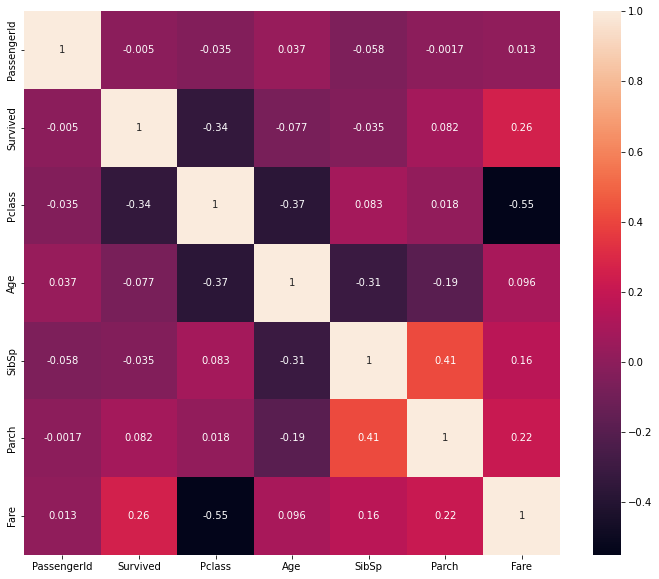

In [125]:
# Heatmap
data_correlations = XTRAIN.corr()
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(data_correlations, annot=True)

# Pclass / Fare - Survived correlation
# Fare - Pclass - neg correlated, one of these could be removed
# Parch - SibSp


<AxesSubplot:xlabel='Sex', ylabel='count'>

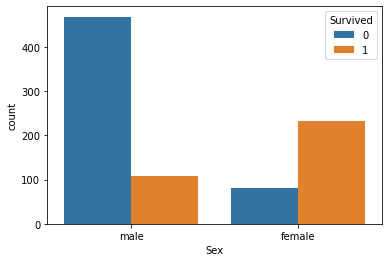

In [126]:
sns.countplot(x="Sex",hue="Survived",data=XTRAIN)

# mostly men died

<AxesSubplot:xlabel='Fare', ylabel='count'>

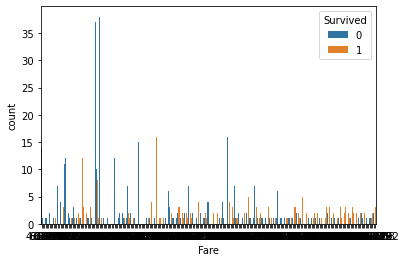

In [127]:
sns.countplot(x="Fare",hue="Survived",data=XTRAIN)

# the lower Fare

<AxesSubplot:xlabel='Pclass', ylabel='count'>

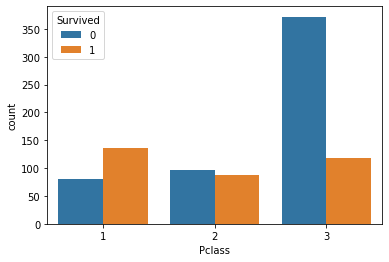

In [128]:
sns.countplot(x="Pclass",hue="Survived",data=XTRAIN)

# mostly people from 3rd class died
# these data is much cleaner than Fare and shows the same

<AxesSubplot:xlabel='SibSp', ylabel='count'>

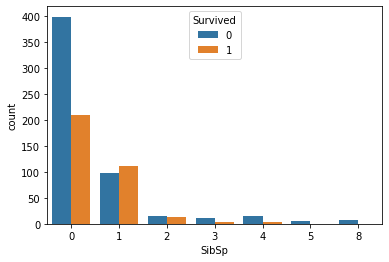

In [129]:
sns.countplot(x="SibSp",hue="Survived",data=XTRAIN)

# most of victims were alone

In [130]:
XTRAIN.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
# Preparing data preprocessing

# As we can see, Cabin has only 210 not-null records (out of 891), so it may be dropped as not helpful.
# Let's see more details about nulls:
XTRAIN.isnull().sum()
# Age - has some missing data, let's fill that up with an average
# for missing Embarked we can drop these 2 records

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
# for the test data we have similar situation with Age, 
# also 1 Fare is missing (will drop that record)
XTEST.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [133]:
# Cabin - besides many empty records it also doesn't look like something interesting, will probably drop it completely.
XTRAIN.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
# Also, columns: Ticket, Name will be dropped as they have only unique strings, so they can't become Categorical columns
# Sex, Embarked - will be converted to Categorical

XTRAIN.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [135]:
XTEST.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [136]:
# Let's see what we can do with missing Embarked values.
# Below you can see that the most frequent value is 'S'.
XTRAIN.Embarked.value_counts()

# Let's fill empty Embarked values with 'S' as this is the most common one.


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
# Same for the test data.
XTEST.Embarked.value_counts()

# Name - I will try to findout if being a member of family gave any better chance of survival. 
# Therefore, I will try to export surnames to separate column and then calculate a family size for each member.

# Below we can see that Surname has now 666 unique values of 891 total.
# So, itself it doesn't look like a good Categorical column

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [138]:

# PREPROCESSING DATA


In [139]:
# find surnames in Name column 
def get_surname(name):
    reg = re.compile('([A-Za-z]+),')
    return reg.findall(name)[0]


# let's define function that will do all the preprocessing discussed above
def preprocess_data(df):
    # replace empty ages with an average
    df['Age'].fillna(df["Age"].mean(), inplace=True)
    # fill missing embarked values with the most common one
    df['Embarked'].fillna('S', inplace=True)

    # we need Surname just to calculate FamilySize, then it may be dropped
    df['Surname'] = df.apply(lambda row: get_surname(row['Name']), axis='columns')
    # Let's calculate family size for each record and see how it corelates with survival
    df['FamilySize'] = df.Surname.map(df.Surname.value_counts())
    df.Surname.value_counts()

    # PassengerId seems to be just a record ID without any importance - also to be dropped.
    df.drop(['Name', 'Surname', 'Cabin', 'Ticket', 'PassengerId'], axis='columns', inplace=True)

    # dropping rows with empty records
    df.dropna(inplace=True)
    
    # converting Categorical cols into numbers
    df = pd.get_dummies(df, columns=["Pclass","Sex","Embarked"])
    
    return df

# and run the preprocessing on both train and test data
XTRAIN = preprocess_data(XTRAIN)
XTEST = preprocess_data(XTEST)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,male,22.0,1,0,7.2500,S,2
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,2
4,3,male,35.0,0,0,8.0500,S,2


In [140]:
XTEST.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [141]:

# ANALYZING RELATIONS BETWEEN THE DATA


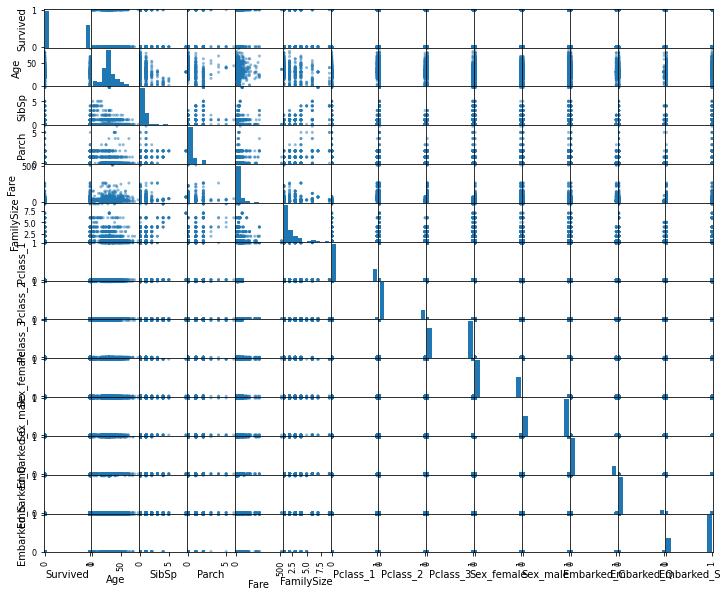

In [142]:
scatter_matrix(XTRAIN, figsize=(12, 10))
plt.show()

<AxesSubplot:>

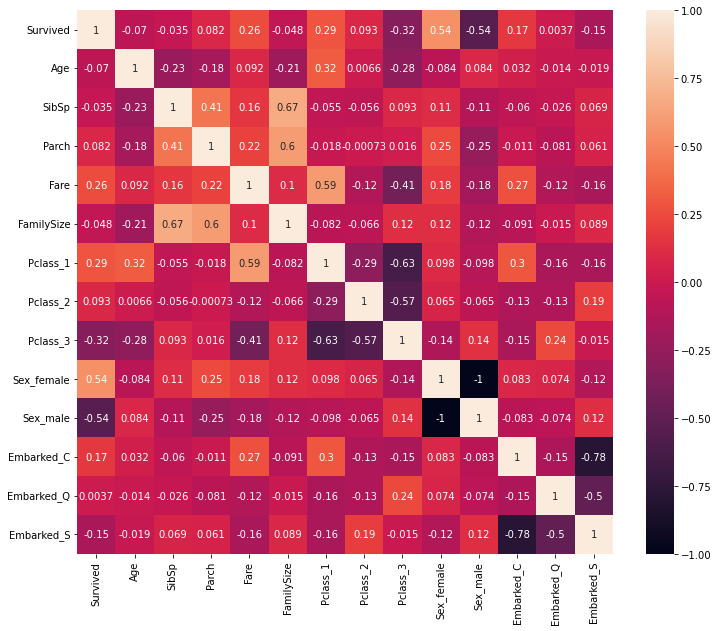

In [143]:
# Heatmap
data_correlations = XTRAIN.corr()
plt.subplots(figsize=(12, 10))

sns.heatmap(data_correlations, annot=True)

# Fare vs Passenger class neg correlation means that the higher class number the lower the price for it
# we can also see that the correlation between Sex and Survival is not interesting as both male and female got about 50%
# there is quite logical correlation between FamilySize, Sibling/Spouse and Parent/Child (between 60-67%)
# Also interesting but small correlation (26%) between Fare and Survival

In [145]:
# Let's separate target from features
y = XTRAIN['Survived']
X = XTRAIN.drop(['Survived'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    int64  
 5   Pclass_1    891 non-null    uint8  
 6   Pclass_2    891 non-null    uint8  
 7   Pclass_3    891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
 10  Embarked_C  891 non-null    uint8  
 11  Embarked_Q  891 non-null    uint8  
 12  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 48.7 KB


In [146]:
# Splitting train data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.info()
# as we can see the number of records in train data is lower now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         712 non-null    float64
 1   SibSp       712 non-null    int64  
 2   Parch       712 non-null    int64  
 3   Fare        712 non-null    float64
 4   FamilySize  712 non-null    int64  
 5   Pclass_1    712 non-null    uint8  
 6   Pclass_2    712 non-null    uint8  
 7   Pclass_3    712 non-null    uint8  
 8   Sex_female  712 non-null    uint8  
 9   Sex_male    712 non-null    uint8  
 10  Embarked_C  712 non-null    uint8  
 11  Embarked_Q  712 non-null    uint8  
 12  Embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 38.9 KB


In [147]:
# TRAINING & HYPERPARAMS TUNING FOR DIFFERENT MODELS. SELECTING BEST RESULTS
# METHOD 1

In [148]:
# First, let's create  some helper functions we will use to print results and optimize best performing model and its params.

def summary(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    # number of correct predictions
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {
        'data_count': len(y_test),
        'accuracy': acc,
        'precision': prec,
        'recall': recall,
        'accuracy_count': num_acc
    }


def print_summary(y_test, y_pred):
    res = summary(y_test, y_pred)
    print('Test data count: ', res['data_count'])
    print('accuracy count: ', res['accuracy_count'])
    print('accuracy score: ', res['accuracy'])
    print('precision score: ', res['precision'])
    print('recall score: ', res['recall'])
    print()

    
def get_best_scoring(modelName, rnames, rvalues, pnames, pvalues):
    max_train = 0
    max_valid = 0
    max_model = ''
    max_est = 0
    max_lr = 0
    max_md = 0
    max_params = {}
    min_valid_score = 0.80
    r = {}
    p = {}
    reg = re.compile('([A-Za-z]+)\(')

    for i in range(len(pnames)):
        p[pnames[i]] = pvalues[i]

    for r1 in rvalues[0]:
        for r2 in rvalues[1]:
            for r3 in rvalues[2]:
                sys.stdout.write('#')

                r[rnames[0]] = r1
                r[rnames[1]] = r2
                r[rnames[2]] = r3
   
                # creating a model from the param and passing other arbitrary params
                model = modelName(**r, **p)
                model.fit(X_train, y_train)
                
                train_score = model.score(X_train, y_train)
                valid_score = model.score(X_valid, y_valid)
                short_name = reg.findall(model.__str__())[0]

                if valid_score > max_valid:
                    max_model = short_name
                    max_train = train_score
                    max_valid = valid_score
                    max_params = r

#                 if valid_score >= min_valid_score:
#                     print(short_name
#                           + ' => train data: {:.3f}'.format(train_score)
#                           + ' val data: {:.3f}'.format(valid_score))

    print()
    print(max_model)
    print('params: ', max_params)
    print(' => train data: {:.3f}'.format(max_train)
          + ' val data: {:.3f}'.format(max_valid))

    return {model: max_model, max_train: max_train, max_valid: max_valid}

#     return "--- TOP SCORE: Model: " + max_model + ' TRAIN: {:.3f}'.format(max_train) + ' VALID: {:.3f}'.format(max_valid)                     

print('Done')

Done


In [149]:

parameters = [
    {    
        'modelName': globals()["KNeighborsClassifier"], 
        'rnames': ['n_neighbors', 'n_jobs', 'leaf_size'],
        'rvalues': [range(17, 22, 1), range(4, 5, 1), range(27, 32, 1)],
        'pnames': [],
        'pvalues': []
    },
    {    
        'modelName': globals()["DecisionTreeClassifier"], 
        'rnames': ['random_state', 'max_depth', 'ccp_alpha'],
        'rvalues': [range(0, 1, 1), range(12, 15, 1), np.arange(0.0, 0.1, 0.1)],
        'pnames': [],
        'pvalues': []
    },
    {
        'modelName': globals()["RandomForestClassifier"],
        'rnames': ['n_estimators', 'n_jobs', 'max_depth'],
        'rvalues':[range(300, 800, 100), range(4, 5, 1), range(3, 7, 1)],
        'pnames': ['max_features'],
        'pvalues': ['auto']
    },
    {
        'modelName': globals()["RandomForestClassifier"],
        'rnames': ['n_estimators','max_depth', 'n_jobs'],
        'rvalues':[range(40, 46, 1), range(4, 7, 1), range(4, 5, 1)],
        'pnames': ['max_features', 'bootstrap'],
        'pvalues': ['auto', 4, False]
    },
    {
        'modelName': globals()["GradientBoostingClassifier"], 
        'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
        'rvalues': [range(150, 500, 100), np.arange(0.02, 0.04, 0.005), range(4, 7, 1)],
        'pnames': [],
        'pvalues': []
    },
    {    
        'modelName': globals()["XGBClassifier"], 
        'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
        'rvalues': [range(150, 400, 100), np.arange(0.05, 0.1, 0.01), range(6, 9, 1)],
        'pnames': ['eval_metric', 'use_label_encoder'],
        'pvalues': ['logloss', False]
    }
]    

best_scoring = []

for p in parameters:
    score = get_best_scoring(p['modelName'], p['rnames'], p['rvalues'], p['pnames'], p['pvalues'])
    best_scoring.append(score)

print("Done")

#########################
KNeighborsClassifier
params:  {'n_neighbors': 21, 'n_jobs': 4, 'leaf_size': 31}
 => train data: 0.743 val data: 0.788
###
DecisionTreeClassifier
params:  {'random_state': 0, 'max_depth': 14, 'ccp_alpha': 0.0}
 => train data: 0.955 val data: 0.793
####################
RandomForestClassifier
params:  {'n_estimators': 700, 'n_jobs': 4, 'max_depth': 6}
 => train data: 0.864 val data: 0.832
##################
RandomForestClassifier
params:  {'n_estimators': 45, 'max_depth': 6, 'n_jobs': 4}
 => train data: 0.860 val data: 0.844
################################################
GradientBoostingClassifier
params:  {'n_estimators': 450, 'learning_rate': 0.035, 'max_depth': 6}
 => train data: 0.951 val data: 0.866
#############################################
XGBClassifier
params:  {'n_estimators': 350, 'learning_rate': 0.09000000000000001, 'max_depth': 8}
 => train data: 0.938 val data: 0.860
Done


In [154]:
# Got best results for: 
# GradientBoostingClassifier(learning_rate=0.025, max_depth=5, n_estimators=250) => train data: 0.947 val data: 0.866

# After choosing the best model along with its hyperparams, we do predictions on test data.
model = GradientBoostingClassifier(learning_rate=0.035, max_depth=6, n_estimators=450)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_summary(y_valid, y_pred)

Test data count:  179
accuracy count:  149
accuracy score:  0.8324022346368715
precision score:  0.819672131147541
recall score:  0.7246376811594203



In [151]:
# second place is for XGBClassifier
model = XGBClassifier(learning_rate=0.09, max_depth=8, n_estimators=350, eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_summary(y_valid, y_pred)

Test data count:  179
accuracy count:  151
accuracy score:  0.8435754189944135
precision score:  0.8253968253968254
recall score:  0.7536231884057971



In [152]:

# TRAINING & HYPERPARAMS TUNING FOR DIFFERENT MODELS. SELECTING BEST RESULTS

# METHOD 2


In [156]:
# In the mean time I finished a Pluralsight course about Classification Models 
# (Recommended: https://app.pluralsight.com/course-player?clipId=bc93208b-396f-4a58-b8b2-2013933c28da)
# And I learnt another hyperparams tuning implementation using GridSearchCV.

def print_gridcv_results(model, trainedModel):
    results = model.cv_results_
    # print(results)
    best_params = model.best_params_
    
    # print('--> Best Params: ', best_params)
    reg = re.compile('([A-Za-z]+)\(')
    trained_model_name = reg.findall(trainedModel.__str__())[0]

    print('Model: ', trained_model_name)
    for i in range(len(results['mean_fit_time'])):
        if results['params'][i] == best_params:
            print('Params: ', results['params'][i])
            print('Mean score: ', results['mean_test_score'][i])
            print()
            # print('Rank: ', results['rank_test_score'][i])
            return


params = [
    {
        'model': KNeighborsClassifier(),
        'hyperparams': {
            'n_neighbors': range(16, 20, 1),
            'n_jobs': range(4, 5, 1),
            'leaf_size': range(25, 29, 1)
        }
    },
    {
        'model': DecisionTreeClassifier(),
        'hyperparams': {
            'max_depth': [1, 2, 3, 4, 5]        
        }
    },
    {
        'model': RandomForestClassifier(n_jobs=4, max_features='auto', bootstrap=False),
        'hyperparams': {
            'n_estimators': range(40, 46, 1),
            'max_depth': range(4, 7, 1)
        }
    },
    {
        'model': RandomForestClassifier(),
        'hyperparams': {
            'n_estimators': range(500, 700, 50),
            'n_jobs': range(4, 5, 1),
            'max_depth': range(3, 6, 1)
        }
    },
    {
        'model': LogisticRegression(solver='liblinear'),
        'hyperparams': {
            'penalty': ['l1', 'l2'],
            'C': [0.7, 0.8, 0.9, 1]
        }
    },
    {
        'model': GradientBoostingClassifier(),
        'hyperparams': {
            'n_estimators': range(150, 300, 50),
            'learning_rate': np.arange(0.01, 0.03, 0.005),
            'max_depth': range(3, 6, 1)
        }
    },
    {
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'hyperparams': {
            'n_estimators': range(100, 200, 50),
            'learning_rate': np.arange(0.04, 0.07, 0.01),
            'max_depth': range(7, 10, 1)
        }
    }
]

# Grid Search with Cross Validation
for p in params:
    model = GridSearchCV(p['model'], p['hyperparams'], cv=5, n_jobs=4, return_train_score=True, scoring='accuracy')
    model.fit(X_train, y_train)
    print_gridcv_results(model, p['model'])


print('Done.')

Model:  RandomForestClassifier
Params:  {'max_depth': 4, 'n_estimators': 650, 'n_jobs': 4}
Mean score:  0.821638924455826

Model:  LogisticRegression
Params:  {'C': 0.9, 'penalty': 'l2'}
Mean score:  0.8019797104304146

Model:  GradientBoostingClassifier
Params:  {'learning_rate': 0.024999999999999998, 'max_depth': 5, 'n_estimators': 200}
Mean score:  0.8271939328277357

Model:  XGBClassifier
Params:  {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
Mean score:  0.8258051807347581

Done.
Model:  KNeighborsClassifier
Params:  {'leaf_size': 25, 'n_jobs': 4, 'n_neighbors': 16}
Mean score:  0.6952526346892544

Model:  DecisionTreeClassifier
Params:  {'max_depth': 5}
Mean score:  0.8202009258347287

Model:  RandomForestClassifier
Params:  {'max_depth': 6, 'n_estimators': 43}
Mean score:  0.8300403821530582

Model:  RandomForestClassifier
Params:  {'max_depth': 5, 'n_estimators': 600, 'n_jobs': 4}
Mean score:  0.821609376538954

Model:  LogisticRegression
Params:  {'C': 0.9, 'pen

In [158]:

# HYPERPARAMS TUNING SUMMARY


In [161]:
model = RandomForestClassifier(max_depth=6, n_estimators=43, n_jobs=4, max_features='auto', bootstrap=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_summary(y_valid, y_pred)

Test data count:  179
accuracy count:  147
accuracy score:  0.8212290502793296
precision score:  0.8245614035087719
recall score:  0.6811594202898551



In [157]:
# Best performing model along with its hyperparams
# Model:  GradientBoostingClassifier
# Params:  {'learning_rate': 0.019999999999999997, 'max_depth': 4, 'n_estimators': 250}
# Mean score:  0.8300712690139346

# After choosing the best model along with its hyperparams, we do predictions on test data.
model = GradientBoostingClassifier(learning_rate=0.015, max_depth=3, n_estimators=250)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_summary(y_valid, y_pred)

Test data count:  179
accuracy count:  150
accuracy score:  0.8379888268156425
precision score:  0.8571428571428571
recall score:  0.6956521739130435



In [162]:
# As we can see hyperparams chosen in both methods are different, so are the results.
# Hyperparams chosen in Method 1 perform better: at 86% of accuracy (against 83%), 
# therefore they should be used in final data prediction and submission.

# model = GradientBoostingClassifier(learning_rate=0.025, max_depth=5, n_estimators=250)
model.fit(X, y)
y_pred = model.predict(XTEST)
# print_summary(y_valid, y_pred)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]
